In [33]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [36]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


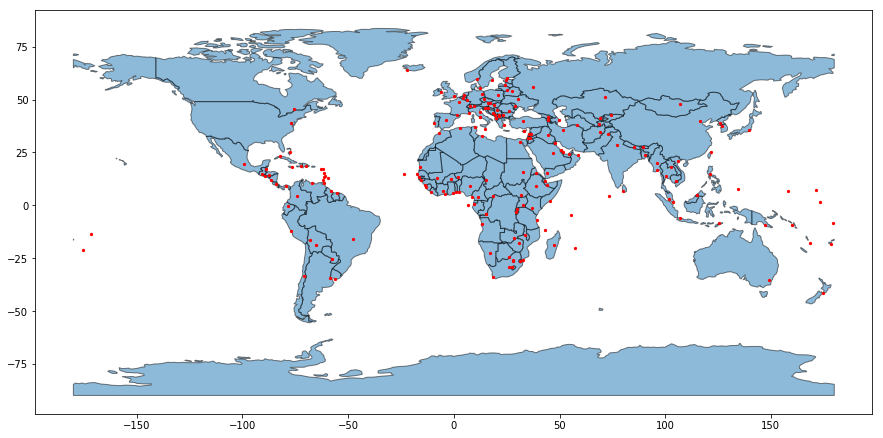

In [37]:
base = world.plot(figsize=(15, 25), alpha=0.5, edgecolor='k');
cities.plot(ax=base, marker='o', color='red', markersize=5);

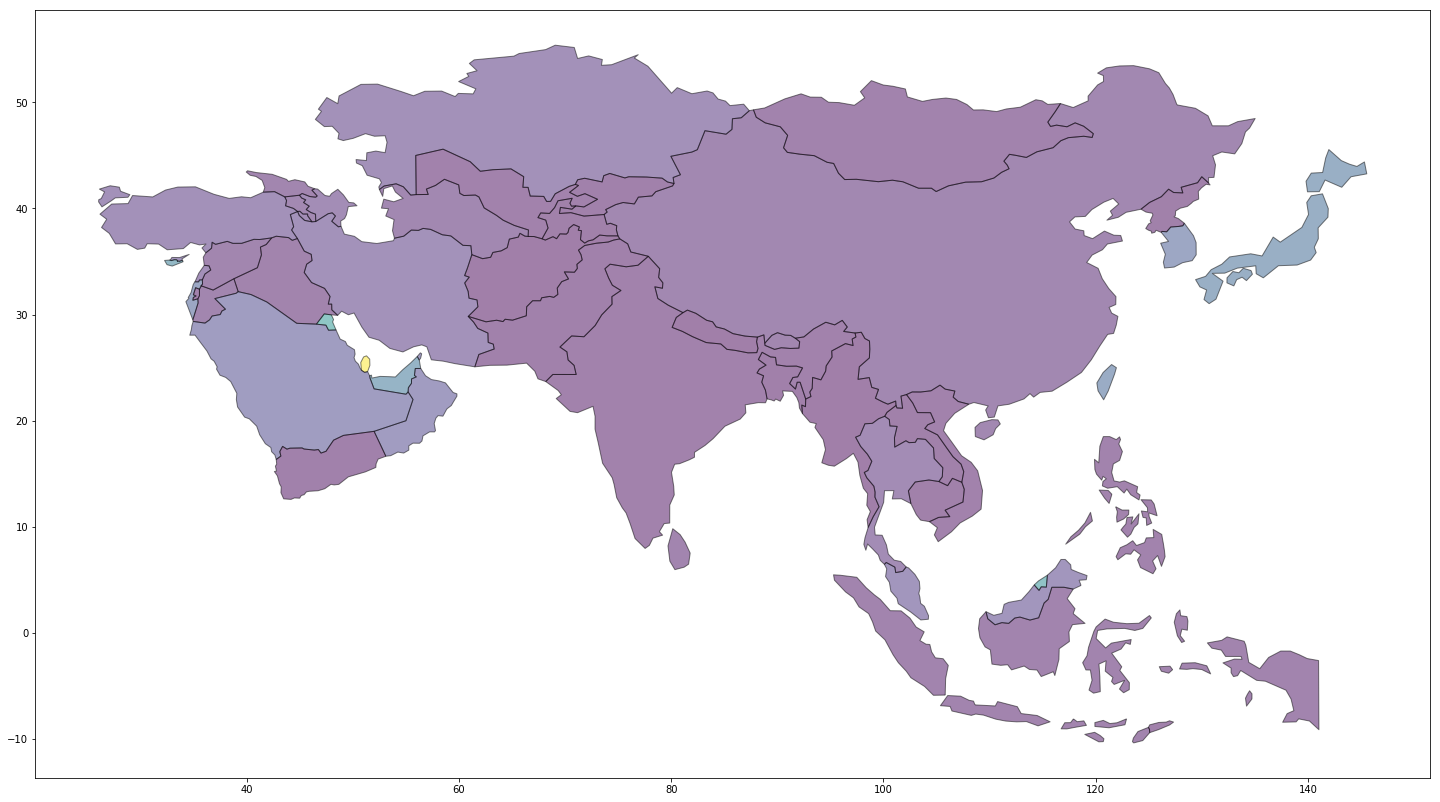

In [16]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.continent == "Asia")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
#world.plot(column='gdp_per_cap');
world.plot(figsize=(25, 17), alpha=0.5, edgecolor='k',column='gdp_per_cap')

In [17]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

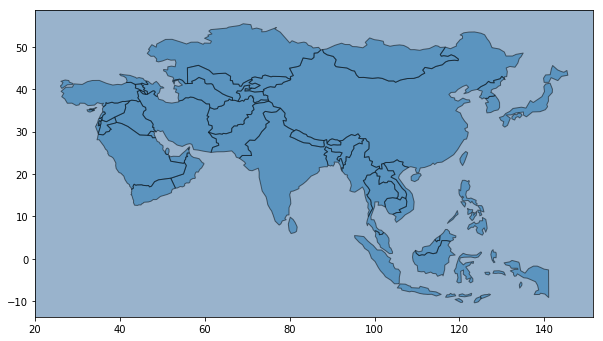

In [20]:
ax = world.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

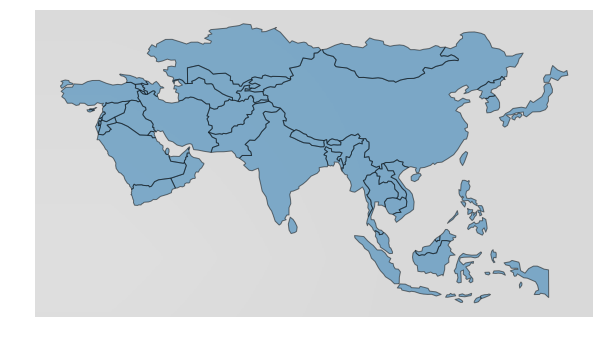

In [21]:
ax = world.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()